In [1]:
from collections import Counter
import numpy as np
from visualize_events.snomed import *
from visualize_events.data import *
from visualize_events.algorithms import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pydot
import networkx as nx
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import plotly
import plotly.express as px
from shapely.ops import voronoi_diagram
from shapely.geometry import MultiPoint, Polygon, Point
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
from plotly.subplots import make_subplots
import cvxopt
from hierarchy_layout import hierarchy_pos


import re
def label_name(label):
#     m = re.search(r'(\w*)[(].*[)]', label)
#     return m.group(0)
    return label[:label.index('(')]

def label_type(label):
    return label[label.index('(')+1:-1]


C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Sean McCarren\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [60]:
T = load_dag()
print(len(T))
preds = get_predictions(861)
T = T.set_predictions(preds, aggregate='sum+unique')
# T = T.compact_preds()

assert T.nodes[263703002].pred_agg > 0
assert T.root.pred_agg > 0
# draw_nodes = nodes
# draw_nodes = representative(T, 50, score=lambda w, d: w * 1/(1.9**d))
# draw_nodes = representative(T, N, score=lambda w, d: w * 1/(1+d))
# draw_nodes = greedy_plus(T, 20)
# cov = CoverageDistance(T, func=np.sqrt)
cov = CoverageDistance(T, func=lambda x: 1 + np.log(x))
draw_nodes = cov.greedy(T, 20)
# draw_nodes = representative(T, 30)
T.aggregate_pred('sum+unique')
assert draw_nodes[0].pred_agg > 0
summary = T.summary_graph(draw_nodes, copy_pred=True, single_source=False, discard_singles=False)
assert draw_nodes[0].pred_agg > 0
if summary.root:
    assert summary.root.pred == T.root.pred
    assert summary.root.pred_agg == T.root.pred_agg
    assert summary.root.pred_agg > 0
print(len(summary))

for n in summary.nodes.values():
    n.pred = n.pred_agg


7 predictions not found


356172
Initialization complete.
20


In [52]:
draw_nodes

[P:1, C:49 NODE: 404684003,
 P:7, C:0 NODE: 409089005,
 P:1, C:94 NODE: 409774005,
 P:2, C:0 NODE: 47739002,
 P:3, C:1 NODE: 386661006,
 P:4, C:1 NODE: 165517008,
 P:1, C:46 NODE: 64572001,
 P:6, C:1 NODE: 302215000,
 P:1, C:91 NODE: 441862004,
 P:6, C:0 NODE: 109995007,
 P:4, C:0 NODE: 422400008,
 P:4, C:49 NODE: 39937001,
 P:1, C:33 NODE: 20139000,
 P:3, C:0 NODE: 230461009,
 P:7, C:1 NODE: 91302008,
 P:1, C:7 NODE: 272520006,
 P:2, C:0 NODE: 422587007,
 P:4, C:0 NODE: 76571007,
 P:2, C:0 NODE: 45007003,
 P:1, C:1 NODE: 271737000]

In [61]:
draw_nodes

[P:1, C:49 NODE: 404684003,
 P:7, C:0 NODE: 409089005,
 P:2, C:0 NODE: 47739002,
 P:3, C:1 NODE: 386661006,
 P:6, C:1 NODE: 302215000,
 P:4, C:1 NODE: 165517008,
 P:7, C:1 NODE: 91302008,
 P:4, C:0 NODE: 76571007,
 P:6, C:0 NODE: 109995007,
 P:3, C:0 NODE: 230461009,
 P:4, C:0 NODE: 422400008,
 P:3, C:1 NODE: 95436008,
 P:2, C:0 NODE: 422587007,
 P:2, C:1 NODE: 409623005,
 P:6, C:0 NODE: 19466003,
 P:3, C:6 NODE: 271807003,
 P:1, C:1 NODE: 271737000,
 P:2, C:0 NODE: 45007003,
 P:2, C:0 NODE: 223176004,
 P:1, C:0 NODE: 20262006]

In [59]:
draw_nodes

[P:4, C:1 NODE: 165517008,
 P:1, C:49 NODE: 404684003,
 P:2, C:0 NODE: 47739002,
 P:3, C:1 NODE: 386661006,
 P:6, C:1 NODE: 302215000,
 P:7, C:1 NODE: 91302008,
 P:4, C:0 NODE: 76571007,
 P:6, C:0 NODE: 109995007,
 P:7, C:0 NODE: 409089005,
 P:3, C:1 NODE: 95436008,
 P:3, C:0 NODE: 230461009,
 P:4, C:0 NODE: 422400008,
 P:2, C:1 NODE: 409623005,
 P:3, C:6 NODE: 271807003,
 P:2, C:11 NODE: 118940003,
 P:2, C:0 NODE: 422587007,
 P:1, C:1 NODE: 271737000,
 P:6, C:0 NODE: 19466003,
 P:4, C:3 NODE: 3424008,
 P:2, C:0 NODE: 45007003]

# Basic visualization

computed pos


(-0.027885805197100943,
 1.0489469431046239,
 -3.5700000000000007,
 0.17000000000000004)

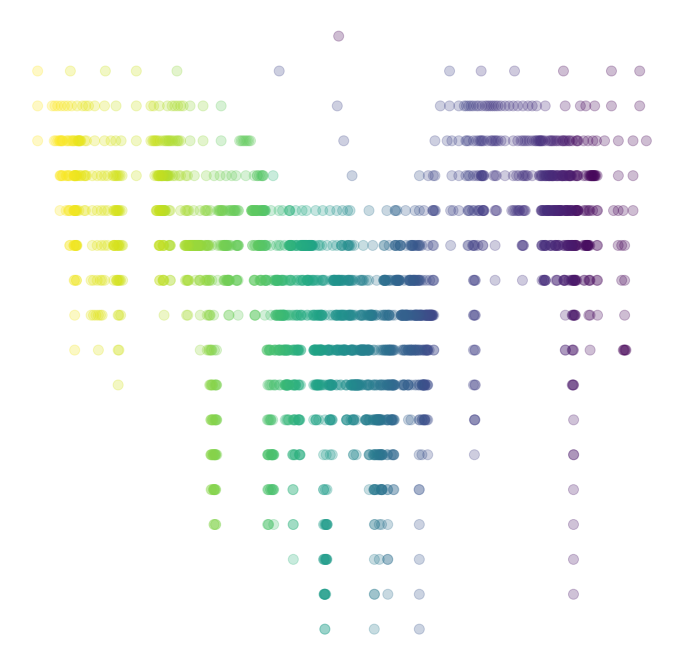

In [47]:
tree = T

c = 9
def l(t):
#     t = label_name(t)[:-1]
    split = t.split(' ')
    ress = []
    res = ''
    for item in split:
        res += ' ' + item
        if len(res) > 10:
            ress.append(res[1:])
            res = ''
    if len(res) > 0:
        ress.append(res[1:])
    joined = '\n'.join(ress)
    return joined

tree.attr_label()

edges = []
edges_to_add_later = []
add_nodes = set()
coloring = dict()
for i, node in enumerate(tree.traverse(raise_on_visited=False, yield_visited=False, yield_first_visit=True)):
    coloring[node.name] = i / (len(tree) - 1)
    if len(add_nodes) == 0: # root
        add_nodes.add(node)
    if node in add_nodes:
        for child in node.children:
            if child not in add_nodes:
                add_nodes.add(child)
                edges.append((node.name, child.name))
            else:
                edges_to_add_later.append((node.name, child.name))

g = nx.DiGraph()
g.add_edges_from(edges)

assert nx.is_tree(g)

pos = hierarchy_pos(g)

g.add_edges_from(edges_to_add_later)

selected_labels = {node.name: l(node.label) for node in tree.nodes.values() if node.name in summary.nodes.keys()}

print("computed pos")
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
# fig, axs = plt.subplots(figsize=(30,15), ncols=2)

# nx.draw_networkx_edges(g, pos, ax=ax, arrowstyle='-', alpha=0.1)
nx.draw_networkx_nodes(g, pos, ax=ax, alpha=0.26, node_size=100, cmap='viridis', node_color=[coloring[n] for n in list(g)])
# nx.draw_networkx(g, pos, ax=axs[1], nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
# nx.draw_networkx_labels(g, pos, ax=axs[1], labels=selected_labels);
# fig
plt.axis('off')
# plt.savefig('full_tree.pdf', bbox_inches='tight', pad_inches = 0)


In [48]:
### Additionally drawing summary nodes around the plot!

(-0.7, 1.71, -3.817022023446691, 0.1817629534974615)

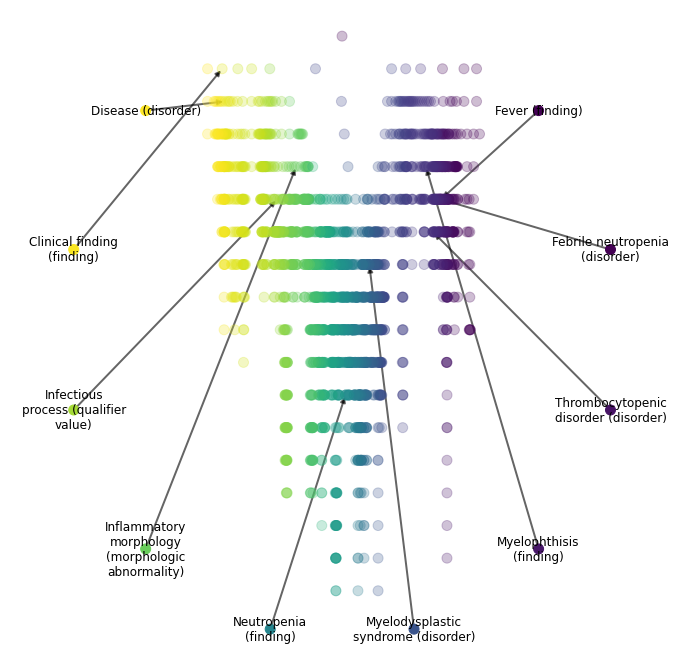

In [50]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
# nx.draw_networkx_edges(g, pos, ax=ax, arrowstyle='-', alpha=0.03)
nx.draw_networkx_nodes(g, pos, ax=ax, alpha=0.26, node_size=100, cmap='viridis', node_color=[coloring[n] for n in list(g)])

mid = pos[409623005]
furthest = pos[404684003]

r = np.sqrt((mid[0] - furthest[0]) ** 2 + (mid[1] - furthest[1]) ** 2) * 1.4

ang_start = 3/4 * np.pi
ang_end = (2 + 1/4) * np.pi

diff = (ang_end - ang_start) / (len(selected_labels) - 1)

colors = [coloring[n] for n in selected_labels.keys()]
order = np.argsort(colors)
# order = [14, 18, 16, 13, 12,  3,  4, 10, 0, 17,  9, 11,  7,  2, 5,  6, 1, 15,  8, 19] # of their method
# order = [5, 12, 17, 14, 11, 10, 3, 13,  4, 19, 15, 9, 7, 16,  0,  2,  6,  1,  8, 18] # of ours with log
# order = [5, 11, 16, 13, 19, 10,  9, 4, 12,  18, 14, 8, 7, 15, 0,  2, 3, 6,  1, 17] # of ours with sqrt

label_pos = dict()
for i, o in enumerate(order):
    name, label = list(selected_labels.items())[o]
    ang = ang_start + diff * i
    loc = (mid[0] - np.cos(ang), mid[1] + 1.9 * np.sin(ang) - 0.4)
    label_pos[name] = loc



for name, label in selected_labels.items():
    arrow = mpl.patches.FancyArrowPatch(posA=label_pos[name], posB=pos[name], alpha=.6, arrowstyle='-|>', color="black", mutation_scale=10, linewidth=2,)
    ax.add_patch(arrow)
    
nx.draw_networkx(g, label_pos, ax=ax, nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
nx.draw_networkx_labels(g, label_pos, ax=ax, labels=selected_labels);
ax.set_xlim((-0.7, 1.71))
plt.axis('off')
# plt.savefig('20_summary_our_method_log.pdf', bbox_inches='tight', pad_inches = 0)


In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
for name, label in selected_labels.items():
    arrow = mpl.patches.FancyArrowPatch(posA=label_pos[name], posB=pos[name], alpha=.4, arrowstyle='-|>', color="black", mutation_scale=10, linewidth=3,)
    ax.add_patch(arrow)
    
nx.draw_networkx(g, label_pos, ax=ax, nodelist=selected_labels.keys(), edgelist=[], with_labels=False, alpha=1.0, node_size=100, cmap='viridis', node_color=[coloring[n] for n in selected_labels.keys()]);
nx.draw_networkx_labels(g, label_pos, ax=ax, labels=selected_labels);

ax.set_xlim((-0.7, 1.71))


In [ ]:
order

# Design 1

In [ ]:
tree = summary


f = 0.1#0.434

tree.attr_label()
nodes = list(tree.nodes.values())
N = len(tree)
indx_P_nodes, P_nodes = [], []
for i, node in enumerate(nodes):
    if (node.pred is not None and node.pred != 0):
        indx_P_nodes.append(i)
        P_nodes.append(node)

N_points = len(P_nodes)
weights = [n.pred for n in P_nodes]

print("Aiming to cover: " + str(np.sum(np.square(np.sqrt(weights) * f * np.sqrt(2)))))
print("That is " + str(np.sum(np.square(np.sqrt(weights) * f * np.sqrt(2))) / 4 * 100) + "%")

# ------- INITIAL POINT ASSIGNMENT --------
anc_store_dict = tree.get_ancestors()
anc_store = [anc_store_dict[n] for n in nodes]

dist = np.zeros((N, N))
for i, anc1 in enumerate(anc_store):
    for j, anc2 in enumerate(anc_store[i+1:], i+1):
#         common = anc1.intersection(anc2)
        diff = anc1.symmetric_difference(anc2)
        #d = 1/len(common)
#         d = 1/(sum(a.depth for a in common)+1)
        d = len(diff) / (len(anc1) + len(anc2))
        dist[i, j] = d
        dist[j, i] = d
dist = np.power(dist, 1.5)


similarity = dist[indx_P_nodes, :][:, indx_P_nodes]

tsne = TSNE(metric="precomputed",
            perplexity=30,
            early_exaggeration=10)
embedding = tsne.fit_transform(similarity)

scaler = MinMaxScaler(feature_range=(-0.95,0.95))
embedding = scaler.fit_transform(embedding)
embedding_original = embedding.copy()

In [ ]:
size = len(tree)
color = {node: i/size for i, node in enumerate(tree.traverse(yield_first_visit=True, raise_on_visited=False, yield_visited=False))}

plt.figure(figsize=(16,16))
ax = plt.gca()

plt.scatter(embedding_original[:, 0], embedding_original[:, 1], s=100, c=[color[n] for n in P_nodes])

ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.savefig('embedding.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
print("Covered area:")


In [ ]:

assert N_points == len(embedding)

# variables xi's, yi's
P = 2 * np.eye(2 * N_points)
q = -  2 * np.concatenate((embedding[:, 0], embedding[:, 1])).reshape(-1, 1)


if False: # cost function depends on weights
    for i, w in enumerate(weights):
        P[i,i] *= w
        P[N_points + i, N_points + i] *= w
        q[i, 0] *= w
        q[N_points + i, 0] *= w

x_order = np.argsort(embedding[:, 0])
y_order = np.argsort(embedding[:, 1])

G = []
h = []

# constraint = np.zeros(2 * N_points)
# constraint[-1] = -1
# G.append(constraint)
# h.append(0)

for i in range(N_points - 1):
    xi = x_order[i]
    xi_plus_1 = x_order[i+1]
    constraint = np.zeros(2 * N_points)
    constraint[xi] = 1
    constraint[xi_plus_1] = -1
    G.append(constraint)
    h.append(0)
    
for i in range(N_points - 1):
    yi = y_order[i]
    yi_plus_1 = y_order[i+1]
    constraint = np.zeros(2 * N_points)
    constraint[N_points + yi] = 1
    constraint[N_points + yi_plus_1] = -1
    G.append(constraint)
    h.append(0)

factor = np.sqrt(2)
for (idx, coef, val) in (
    (x_order[0], -1, 1-factor*f*np.sqrt(weights[x_order[0]])), # -1 < x0 => -x0 <= 1
    (x_order[-1], 1, 1-factor*f*np.sqrt(weights[x_order[-1]])), # xl < 1 => xl <= 1
    (N_points + y_order[0], -1, 1-factor*f*np.sqrt(weights[y_order[0]])), # -1 < y0 => -y0 <= 1
    (N_points + y_order[-1], 1, 1-factor*f*np.sqrt(weights[y_order[-1]])), # yl < 1 => yl <= 1
):
    constraint = np.zeros(2 * N_points)
    constraint[idx] = coef
    G.append(constraint)
    h.append(val)

# for (idx, coef, w) in (
#     (x_order[0], -1, factor*np.sqrt(weights[x_order[0]])), # -1+fw < x0 => -x0+fw <= 1
#     (x_order[-1], 1, factor*np.sqrt(weights[x_order[-1]])), # xl < 1-fw => xl+fw <= 1
#     (N_points + y_order[0], -1, factor*np.sqrt(weights[y_order[0]])), # -1+fw < y0 => -y0+fw <= 1
#     (N_points + y_order[-1], 1, factor*np.sqrt(weights[y_order[-1]])), # yl < 1-fw => yl+fw <= 1
# ):
#     constraint = np.zeros(2 * N_points+1)
#     constraint[idx] = coef
#     constraint[-1] = w
#     G.append(constraint)
#     h.append(1)

    
x_order = x_order.tolist()
y_order = y_order.tolist()

def constrain(pi, pj):
    assert pi != pj
    # wi + wj <= dist_x + dist_y
    # -(dist_x + dist_y) <= -(wi + wj)f
    # -(dist_x + dist_y) + (wi + wj)f <= 0
#     pix, piy = embedding[pi].tolist()
#     pjx, pjy = embedding[pj].tolist()
    constraint = np.zeros(N_points * 2)
    if x_order.index(pi) < x_order.index(pj):
        # dist_x = pj - pi
        constraint[pi] = 1
        constraint[pj] = -1
    else:
        constraint[pi] = -1
        constraint[pj] = 1
    if y_order.index(pi) < y_order.index(pj):
        # dist_y = pj - pi
        constraint[N_points + pi] = 1
        constraint[N_points + pj] = -1
    else:
        constraint[N_points + pi] = -1
        constraint[N_points + pj] = 1

    w = -(np.sqrt(weights[pi]) + np.sqrt(weights[pj])) * f
#     constraint[-1] = np.sqrt(weights[pi]) + np.sqrt(weights[pj])
    
    G.append(constraint)
    h.append(w)

for dim in (0,1):
    while len(np.unique(embedding[:, dim])) != N_points:
        embedding[:, dim] += np.random.normal(scale=0.00001, size=N_points)
        print("Warning: duplicate coordinates. Randomly shifting coordinates a tiny bit.")
    
for pi in range(N_points):
    for pj in range(N_points):
        if pi == pj:
            continue
#         if pi < pj:
#             constrain(pi, pj)
#         continue
        if embedding[pi, 0] < embedding[pj, 0]:
            if embedding[pi, 1] < embedding[pj, 1]:
                one = (embedding[:, 0] > embedding[pi, 0]) & (embedding[:, 1] > embedding[pi, 1])
                two = (embedding[:, 0] < embedding[pj, 0]) & (embedding[:, 1] < embedding[pj, 1])
                if np.any(one & two):
                    continue
            elif embedding[pi, 1] > embedding[pj, 1]:
                one = (embedding[:, 0] > embedding[pi, 0]) & (embedding[:, 1] < embedding[pi, 1])
                two = (embedding[:, 0] < embedding[pj, 0]) & (embedding[:, 1] > embedding[pj, 1])
                if np.any(one & two):
                    continue
            else:
                raise ValueError()
            
        elif embedding[pi, 0] == embedding[pj, 0]:
            raise ValueError()
        else:
            continue
        constrain(pi, pj)
        
            
G = np.array(G).astype(np.double)
h = np.array(h).astype(np.double)

assert G.shape == (len(h), 2 * N_points )

P = P.astype(np.double)
q = q.astype(np.double)

assert P.shape == (2 * N_points , 2 * N_points )
assert q.shape == (2 * N_points , 1)

    
def cvxopt_solve_qp(P, q, G=None, h=None, A=None, b=None):
    P = .5 * (P + P.T)  # make sure P is symmetric
    args = [cvxopt.matrix(P), cvxopt.matrix(q)]
    if G is not None:
        args.extend([cvxopt.matrix(G), cvxopt.matrix(h)])
        if A is not None:
            args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((P.shape[1],))

result = cvxopt_solve_qp(P, q, G=G, h=h)
embedding[:, 0] = result[:N_points]
embedding[:, 1] = result[N_points:]

plt.scatter(embedding[:, 0], embedding[:, 1], s=[8000*n.pred for n in P_nodes], c=['r' if i in (x_order[0], x_order[-1], y_order[0], y_order[-1]) else 'b' for i in range(N_points)])
plt.savefig('test.pdf')

print("Average displacement: "  + str(np.mean(np.linalg.norm(embedding_original - embedding, axis=1))))

In [ ]:
plt.show()

In [ ]:
cmap = mpl.cm.get_cmap('viridis')

plt.figure(figsize=(16,16))
ax = plt.gca()
for emb, n in zip(embedding, P_nodes):
    rad = np.sqrt(n.pred) * f
    width = np.sqrt(2) * rad
    ax.add_patch(plt.Rectangle((emb[0] - rad, emb[1]), width, width, -45, fc=cmap(color[n])))
    if n.pred >= np.quantile(weights, 0.9) and False:
        ax.text(*emb.tolist(), label_name(n.label), verticalalignment='bottom', horizontalalignment='center')
        ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.savefig('orthogonal_problem.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
print("Covered area:")

In [ ]:
plt.figure(figsize=(16,16))
ax = plt.gca()
for emb, n in zip(embedding, P_nodes):
    rad = np.sqrt(n.pred) * f / np.sqrt(2)
    rad = rad / np.cos(15/180*np.pi)
    ax.add_patch(mpl.patches.RegularPolygon(emb, 6, rad, 30/180*np.pi))
    if n.pred >= np.quantile(weights, 0.):
        ax.text(*emb.tolist(), label_name(n.label), verticalalignment='bottom', horizontalalignment='center')
        ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
tree.add_parent_store()
from itertools import combinations

tree.descendant_pred()
pred_nodes = tree.root.preds
weights = dict()
for n in tree.nodes.values():
    if n is tree.root:
        continue
    for a, b in combinations(n.preds, 2):
        if id(a) > id(b):
            a, b = b, a
        w = weights.get((a, b), 0)
        weights[(a, b)] = w + 1 * n.depth
print(weights)

def nx_from_edge_weights(edge_weights):
    if isinstance(edge_weights, dict):
        edge_weights = edge_weights.items()
    G = nx.Graph()
    G.add_edges_from([(*key, {"weight": weight}) for key, weight in edge_weights])
    return G

# Could check if entire thing is planar or do binary/exponential search backwards
sort_weights = sorted(weights.items(), key=lambda x: x[1], reverse=True)
include = sort_weights[:4].copy()
g = nx_from_edge_weights(include)
deleted = 0
added = 4
for key, weight in sort_weights[4:]:
    g.add_edge(*key, weight=weight)
    is_planar, emb = nx.check_planarity(g)
    if not is_planar:
        g.remove_edge(*key)
        deleted += 1
        if deleted == 100:
            break
    else:
        added += 1
    
print(f"Deleted {deleted} from {len(weights)} edges, added {added}")
pos = nx.planar_layout(g)
nx.draw(g, pos=pos)

In [ ]:
embedding = embedding_original.copy()
# ------- IMPROVING POINT ASSIGNMENT --------
max_movement = 0.05
epochs = 1000
cooldown_period = 100
cooldown = False
window_size = 500
verbose = 50

target_coverage = 0.4 * 4

weights = np.array([p.pred for p in P_nodes])

f = np.sqrt(target_coverage/(np.pi*np.sum(weights)))
print("f = " + str(f))
print("target_coverage = " + str(np.sum(np.power(f*np.sqrt(weights), 2)*np.pi)))
# f = 1.


radius = f * np.sqrt(weights)
radius_sum = np.tile(radius.reshape(-1, 1), (1, N_points)) + np.tile(radius.reshape(1, -1), (N_points, 1))

movements = np.zeros(epochs)

# distance_AB * f > np.sqrt(weightA) + np.sqrt(weightB) 
# cross_sum/distance < f
# for larger f, the distance_AB may be smaller
# for smaller f, the distance_AB must be larger
# maybe start with large f, and decrease it.

# move points away from eachother

for epoch in range(epochs):
    if (epoch+1) % 100 == 0:
        plt.scatter(embedding[:, 0], embedding[:, 1], s=[10000*(n.pred)/f for n in P_nodes])
        plt.show()

#     within = (embedding[:, 0] < 1) & (embedding[:, 0] > -1) & (embedding[:, 1] < 1) & (embedding[:, 1] > -1)
#     print(f"Inside: {np.mean(within) * 100}%")
    
#     pw = similarity
    recompute_pw = True
    while recompute_pw:
        recompute_pw = False
        pw = pairwise_distances(embedding)
        for i in range(N_points):
            pw[i,i] = np.inf
        min_pw = np.min(pw)
    #     print(f"Smallest pw: {min_pw}")
        indx_nonzero = (pw == 0).nonzero()
        for i, j in zip(*indx_nonzero):
            embedding[i] += np.random.randn(2) / 10000
            recompute_pw = True
        min_pw = np.min(pw)

    # move[x, y] = -(emb[x] - emb[y])
    move =  - (np.tile(embedding.reshape(N_points, 1, 2), (1, N_points, 1)) - np.tile(embedding.reshape(1, N_points, 2), (N_points, 1, 1)))
    
    # pairwise repelling    
    # overlap_dist = r_1 + r_2 - |emb[x] - emb[y]|
    # if overlap_dist > 0, F = move[x, y]/|emb[x] - emb[y]| * overlap_dist / 2
    pw_fix = pw.copy()
    pw_fix[range(N_points), range(N_points)] = 0
    overlap_dist = radius_sum - pw_fix
#     print(overlap_dist)
    overlapping = (overlap_dist > 0)
    overlapping[range(N_points), range(N_points)] = False
    N_overlaps = np.sum(overlapping)
    overlap_dist = overlap_dist * overlapping
    F_pw = - np.divide(overlap_dist, pw) * 0.5
    
    assert F_pw.shape == pw.shape

    F_pw = np.tile(F_pw.reshape(N_points, N_points, 1), (1, 1, 2)) * move
    F_pw = np.sum(F_pw, axis=1)
    # F_pw[x] = force vec of x

    # repelling from edges
    # direction: center, magnitude: ~ L5 norm ( not L2 so corners can get fuller )
    # also cut off repelling at certain ratio
    for dim in (0,1):
        for i in np.where(embedding[:, dim] - radius < -1)[0]:
            embedding[i, dim] - radius[i]
            F_pw[i, dim] += - 1 - embedding[i, dim] + radius[i]
        for i in np.where(embedding[:, dim] + radius > 1)[0]:
            F_pw[i, dim] +=   1 - embedding[i, dim] - radius[i]
    # F = -pos
    
    
    # attracting based on embedding
    dir_times_magnitude = embedding_original - embedding
    F_emb = dir_times_magnitude
    
    # to ensure that repel>attraction
    pwrepel = np.linalg.norm(F_pw, axis=1) 
#     embattr = np.linalg.norm(F_emb, axis=1)
    F_sum = F_pw
    if not cooldown:
            for i in np.where(pwrepel == 0)[0]:
                F_sum[i] += F_emb[i]
    else:
        max_movement *= 0.95
        cooldown_period -= 1

    movement = np.linalg.norm(F_sum, axis=1)
    for i in np.where(movement > max_movement)[0]:
        F_sum[i] = F_sum[i] * (max_movement / movement[i])

    assert F_sum.shape == embedding.shape

    total_movement = np.sum(np.linalg.norm(F_sum, axis=1))
    movements[epoch] = total_movement
    if verbose != False:
        if epoch % verbose == 0:
            print("Total movement " + str(total_movement))
            print("Total overlaps " + str(N_overlaps))
    
    embedding = embedding + F_sum
    
    if (epoch+1) % window_size == 0 and epoch > window_size:
        if total_movement >= np.mean(movements[epoch - window_size:epoch]):
            cooldown = True
            print("Started cooldown")
    
    if not cooldown and epoch >= epochs-cooldown_period-1:
        cooldown = True
        print("Started cooldown")
    elif cooldown and cooldown_period <= 0:
        print("Exited cooldown")
        break
    
within = (embedding[:, 0] < 1) & (embedding[:, 0] > -1) & (embedding[:, 1] < 1) & (embedding[:, 1] > -1)
print(f"Inside: {np.mean(within) * 100}%")
print(f"Final f={f}.")

occupied_area = np.sum(np.power(radius, 2) * np.pi)
print(f"Occupied area" + str(occupied_area))

diff_emb = embedding - embedding_original
plt.scatter(diff_emb[:, 0], diff_emb[:, 1], s=[800*np.sqrt(n.pred)/f for n in P_nodes])
plt.show()

In [ ]:
pw = pairwise_distances(embedding)

weights = np.array([p.pred for p in P_nodes])
radius = f * np.sqrt(weights)
radius_sum = np.tile(radius.reshape(-1, 1), (1, N_points)) + np.tile(radius.reshape(1, -1), (N_points, 1))

pw[range(N_points), range(N_points)] = np.infty
factor = np.min(pw / radius_sum)
print("Need to reduce the radius by " + "{:2.2f}".format((1-factor)*100) + "%")
f *= factor
print("f = " + str(f))
coverage = np.sum(np.power(f*np.sqrt(weights), 2)*np.pi)
print("coverage = " + str(coverage) + ", " + "{:2.2f}%".format(coverage/4 * 100))

In [ ]:
cmap = mpl.cm.get_cmap('viridis')

plt.figure(figsize=(16,16))
ax = plt.gca()
for emb, n in zip(embedding, P_nodes):
    ax.add_patch(plt.Circle(emb.tolist(), np.sqrt(n.pred) * f, fc=cmap(color[n]))) # ec="white"
#     if n.pred > np.quantile(weights, 0.8):
#         ax.text(*emb.tolist(), label_name(n.label), verticalalignment='bottom', horizontalalignment='center')
#         ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
ax.set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.savefig('bubbles.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()

In [ ]:

depths = tree.get_depths()

area_to_colors = []
for d in range(len(depths)):
    area_to_color = {n: [] for n in P_nodes}
    V_d = depths[d]
    for i, v in enumerate(V_d):
        Rv = v.preds
        for l in Rv:
            area_to_color[l].append(i)
    k = len(V_d)
    for key,value in area_to_color.items():
        if len(value) == 0:
            value.append(k)
            k+=1
    area_to_colors.append(area_to_color)

# ------- COMPUTE VORONOI --------
points = MultiPoint(embedding.tolist())

regions = voronoi_diagram(points)

min_x = -1
min_y = -1
max_x = 1
max_y = 1
box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

P_to_region = {}
for i, node in enumerate(P_nodes):
    coord = embedding[i]
    p = Point(*coord)
    found = False
    for region in regions:
        if region.contains(p):
            assert not found
            found = True
            P_to_region[node] = region

# ------- PLOT --------

def path(coords):
    svg = "M" + "L".join([str(px) + "," + str(py) for px,py in coords]) + "Z" # could do coords[:-1] I think
    return svg

depth_choices = [len(depths)-1]#range(len(depths))#[0,1,2,3,4,5,10,15,20]
figs = []
for subplot_i, d in enumerate(depth_choices):
    fig = go.Figure()

    # Update axes properties
    fig.update_xaxes(
        showticklabels=False,
        showgrid=False,
        zeroline=False,
    )

    fig.update_yaxes(
        showticklabels=False,
        showgrid=False,
        zeroline=False,
        scaleanchor = "x",
        scaleratio = 1,
    )

    shapes = []
    colors = plotly.colors.sample_colorscale(colorscale='Turbo', samplepoints=k)
    np.random.shuffle(colors)
    for i, node_with_pred in enumerate(P_nodes):
        region = P_to_region[node_with_pred]
        poly = region.intersection(box)
        polygon = [p for p in poly.exterior.coords]
    #     print(polygon)
    #     plt.fill(*zip(*polygon), alpha=0.4)

        assignments = area_to_colors[d][node_with_pred]
        color = colors[np.random.choice(assignments).item()]
        shapes.append(
            dict(
                type="path",
                path=path(polygon),
                fillcolor=color,
                line_color=color,
            )
        )


    # Add shapes
    fig.update_layout(
        shapes=shapes,
        xaxis_range=[-1,1],
        yaxis_range=[-1,1],
        hovermode="closest",
        height=1000, width=1000
    )
    
    for emb, n in zip(embedding, P_nodes):
        fig.add_annotation(
            x=emb[0],
            y=emb[1],
            text=label_name(n.label),
            showarrow=False,
            yshift=10
        )
        fig.add_annotation(
            x=emb[0],
            y=emb[1],
            text=label_type(n.label),
            showarrow=False,
            yshift=-10
        )
#         ax.text(*emb.tolist(), label_name(n.label), verticalalignment='bottom', horizontalalignment='center')
#         ax.text(*emb.tolist(), label_type(n.label), verticalalignment='top', horizontalalignment='center')
#     ax.set_aspect('equal')
#     plt.xlim(-1, 1)
#     plt.ylim(-1, 1)
#     plt.show()

    figs.append(fig)

for depth, fig in zip(depth_choices, figs):
    print("Depth of ", depth)
    fig.show()

In [ ]:
from visualize_events import HexMerge
alg = HexMerge()

alg.fit(tree)
fig = alg.make_fig()

In [ ]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()


# Design 2

In [ ]:
full_tree = T

tree = summary.copy()
tree.reset_pred()
tree.descendant_pred()
tree.attr_label()

T.attr_label()

N = None

# cmap = mpl.cm.get_cmap('viridis')
# cmap = px.colors.sequential.Viridis
for i, node in enumerate(full_tree.traverse(raise_on_visited=False, yield_visited=False, yield_first_visit=True)):
    coloring[node.name] = i / (len(full_tree) - 1)

nodes = None
sum_pred = full_tree.root.pred_agg

indx_P_nodes, P_nodes = [], []
for i, node in enumerate(full_tree.nodes.values()):
    if (node.pred is not None and node.pred != 0):
        indx_P_nodes.append(i)
        P_nodes.append(node)
P_N = len(P_nodes)

depths = tree.get_depths()

P_nodes_names = [n.name for n in P_nodes]
total_P = None

def comp_coords(assignment):
    x_last = 0
    x_partition = [x_last]
    for assigned in assignment:
        pred = P_nodes[assigned].pred
        x_last += pred / sum_pred
        x_partition.append(x_last)
    assert abs(x_partition[-1] - 1) < 1e-6
    return x_partition

P_nodes_color = [coloring[node.name] for node in P_nodes]
assignment = np.argsort(P_nodes_color)
# assignment = np.arange(P_N)
assert len(assignment == P_N)


nodes_in_tree = set(list(tree.nodes.keys()))

def local_cost(i):
    cost = 0
    P_node = P_nodes[assignment[i]]
    ancs_a = set(list(P_node.ancestors()))
    if i > 0:
        P_node_left = P_nodes[assignment[i-1]]
        ancs_b = set(list(P_node_left.ancestors()))
        diff = [n.name for n in ancs_a.symmetric_difference(ancs_b) if n.name in nodes_in_tree]
        cost -= len(diff)
        
    if i < P_N - 1:
        P_node_right = P_nodes[assignment[i+1]]
        ancs_b = set(list(P_node_right.ancestors()))
        diff = [n.name for n in ancs_a.symmetric_difference(ancs_b) if n.name in nodes_in_tree]
        cost -= len(diff)
    
    return cost

def local_change(i, j):
    cost_now = local_cost(i) + local_cost(j)

    temp = assignment[i]
    assignment[i] = assignment[j]
    assignment[j] = temp
    
    cost_then = local_cost(i) + local_cost(j)
    
    temp = assignment[i]
    assignment[i] = assignment[j]
    assignment[j] = temp
    
    return cost_then - cost_now

def cost(assignment):
    inverse_assignment = {P_nodes[j].name: i for i, j in enumerate(assignment)}
    cost = 0.
    for node in tree.nodes.values():
        to_draw = np.zeros(P_N+1, dtype=bool)
        full_tree_node = full_tree.nodes[node.name]
        for pred in full_tree_node.preds:
            if pred.name in P_nodes_names:
                block = inverse_assignment[pred.name]
                to_draw[block] = True
        last_draw_here = None
        time_since_last_draw = 0
        for draw_here in to_draw:
            if draw_here:
                if last_draw_here is not None:
                    cost += 1 + time_since_last_draw
                last_draw_here = draw_here
                time_since_last_draw = 0
            time_since_last_draw += 1
    return - cost

best = cost(assignment)

Nchanged = 0

for i in range(1, P_N - 1):
    rel_cost = np.zeros(P_N)
    for j in range(i+1, P_N):
        rel_cost[j] = local_change(i, j)
    if np.min(rel_cost) != 0:
        j = np.argmin(rel_cost)
    else:
        continue
    temp = assignment[i]
    assignment[i] = assignment[j]
    assignment[j] = temp

for _ in range(1000):
    i, j = np.random.choice(P_N, size=2, replace=False).tolist()
    changed = local_change(i, j) < 0
#     print(changed)
    if changed:
        Nchanged += 1
        temp = assignment[i]
        assignment[i] = assignment[j]
        assignment[j] = temp
#         assert cost(assignment) < best
#     else:
#         assert cost(assignment) == best
#     np.random.shuffle(assignment)
#     new_cost = cost(assignment)
#     if new_cost < best:
#         best = new_cost
#         best_assignment = assignment.copy()

inverse_assignment = {P_nodes[j].name: i for i, j in enumerate(assignment)}
x_partition = comp_coords(assignment)
    
fig = go.Figure()

# Update axes properties
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    range=[0, 1],
    fixedrange=True
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
#     scaleanchor = "x",
#     scaleratio = 1,
#     range=[y_min - radius, y_max + radius]
)

def add_row(node, y=None, y_bottom=None, opacity=1., text=True):
    to_draw = np.zeros(P_N+1, dtype=bool)
    if y_bottom is None:
        y_bottom = y - (1/len(tree.nodes))
    full_tree_node = full_tree.nodes[node.name]
    for pred in full_tree_node.preds:
        if pred.name in P_nodes_names:
            block = inverse_assignment[pred.name]
            to_draw[block] = True
    x_coords, y_coords = [], []
    prev = False
    for i, draw_here in enumerate(to_draw):
        if prev == False and draw_here == True:
            if len(x_coords) > 0:
                x_coords.append(None)
                y_coords.append(None)
            x_coords.append(x_partition[i])
            x_coords.append(x_partition[i])
            y_coords.append(y)
            y_coords.append(y_bottom)
        elif prev == True and draw_here == False:
            x_coords.append(x_partition[i])
            x_coords.append(x_partition[i])
            y_coords.append(y_bottom)
            y_coords.append(y)

            x_coords.append(x_coords[len(x_coords) - 4])
            y_coords.append(y_coords[len(y_coords) - 4])
        prev = draw_here
    if text == False:
        text = ''
    else:
        text = [node.label] + ['' for _ in range(len(x_coords) - 1)]
    fig.add_trace(go.Scatter(x=x_coords, y=y_coords, fill="toself", opacity=opacity,
                             mode="text", marker={'color':coloring[node.name], 'colorscale':"Viridis"}, textposition="bottom right",
                             text=text, visible=True)) # mode="lines"
#     print(any(e for e in to_draw))

    # modes: none, lines, text, markers
P_N_in_tree = [n for n in tree.nodes.values() if not (n.pred is None or n.pred == 0.)]
y = - (len(tree.nodes) - len(P_N_in_tree)) / len(tree.nodes)
# y = - (len(nodes) - P_N_in_tree) / len(nodes)
for V_d in depths:
    for node in V_d:
        if not (node.pred is None or node.pred == 0.):
            add_row(node, y=0, y_bottom=min(y*1.2, y-1/len(tree.nodes)), opacity=0.1, text=False)
            add_row(node, y=y, y_bottom=min(y*1.2, y-1/len(tree.nodes)))

y = 0
for V_d in depths:
    for node in V_d:
        if node.pred is None or node.pred == 0.:
            add_row(node, y=y)
            y -= 1 / len(tree.nodes)
            
config = dict({'scrollZoom': True})
fig.show(config=config)

Nchanged

In [ ]:
np.all(assignment == np.arange(P_N))

In [ ]:
cost(assignment)

# Design 3

In [ ]:
from visualize_events import HexMerge
alg = HexMerge(fraction_occupied_hexes=0.9, distance_factor=0.01, adjacency_factor=0, kmax=0)
alg.fit(tree)
fig = alg.make_fig()

In [ ]:
# A={0,1}x[0,n]x[0,m] -> P
# 2nm places -> P

# nodes_df = pd.DataFrame({'name':[0,1,2,3,4,5],'label':[0,1,2,3,4,5]}).set_index('name')
# edges_df = pd.DataFrame({'parent':[0, 0, 0, 1, 2, 3,1],'child':[1, 2, 3, 4, 4, 4,5]})
# diamond_tail = DAG(nodes_df, edges_df)
# predictions = pd.Series([1, 1], index=[4, 5])
# t = diamond_tail.set_predictions(predictions)

# ---------- PARAMS
t = C

target_hexes = 1000
kmax = 0
same_leaf_factor = 1
adjacency_factor = 1
distance_factor = 100
hexes_scaling = lambda x : x
temperature = lambda k, kmax: (1 - (k)/kmax) ** 2 / 20 #.1/np.exp(k / 100).item()
acceptance_function = lambda cost_diff, T, rv: cost_diff < 0 or np.exp((-cost_diff+0.01)/T) >= rv
quantile = .0
moved_running_avg_window = 10000
MOVED_LOWERBOUND = 0.03
# hexes_scaling = lambda x : 1 + np.sqrt(x).item() # PARAM.


# ---------- PLOTTING PARAMS
angle = - np.pi / 6
radius = 1/np.sqrt(3)
angles = np.array([angle + k * (np.pi/3) for k in range(6)])
x_hex = radius * np.cos(angles)
y_hex = radius * np.sin(angles)
x_width = np.amax(x_hex) - np.amin(x_hex)
y_width = np.amax(y_hex) - np.amin(y_hex)

def center(row, col):
    cx = (col * radius * 1.5)
    cy = np.sqrt(3) * row
    if col % 2 == 1:
        cy = cy + np.sqrt(3) * 0.5
    return cx, cy

def cartesian(a, r, c):
    return (
        a/2 + c,
        np.sqrt(3) * (a/2 + r)
    )



n = int(np.sqrt(target_hexes) // 2)
m = int(np.sqrt(target_hexes))
assert 2 * n * m <= target_hexes

scaled = [hexes_scaling(P_node.pred) for P_node in t.nodes.values() if P_node.pred is not None]
sum_scaled = sum(scaled)
to_place = []

nodes = list(t.nodes.values())
N = len(t)
indx_P_nodes, P_nodes = [], []
for i, node in enumerate(nodes):
    if (node.pred is not None and node.pred != 0):
        hexes = int(np.floor(hexes_scaling(node.pred) / sum_scaled * (2*n*m)).item())
        if hexes <= 0:
            continue
        indx_P_nodes.append(i)
        P_nodes.append(node)
        for _ in range(hexes):
            to_place.append(len(P_nodes) - 1)
P_N = len(P_nodes)


# to_place = [i for i, P_node in enumerate(P_nodes) for _ in range(int(np.floor(scaled[i] / sum_scaled * (2*n*m)).item()))]

assert 2 * n * m >= len(to_place)

t.add_parent_store()
from itertools import combinations
t.descendant_pred()
pred_nodes = t.root.preds
weights = dict()
for node in t.nodes.values():
    if node is t.root:
        continue
    significant_preds = [pred for pred in node.preds if pred in P_nodes]
    for a, b in combinations(significant_preds, 2):
        if a == b:
            assert False
        if id(a) > id(b):
            a, b = b, a
        w = weights.get((a, b), 0)
        weights[(a, b)] = w + 1 * node.depth

total_weight = sum(weights.values())

for k, v in weights.items():
    weights[k] = (v / total_weight) * adjacency_factor

# weight all adjacencies and all transitive stuff the same    
for P_node in P_nodes:
    weights[(P_node, P_node)] = same_leaf_factor / P_N

node_to_idx = {node: i for i, node in enumerate(P_nodes)}
new_weights = dict()
for k, v in weights.items():
    n1, n2 = k
    n1, n2 = node_to_idx[n1], node_to_idx[n2]
    new_weights[(n1, n2)] = v

weights = new_weights

# ------- DESIRED LOCATION --------
anc_store = t.get_ancestors()

dist = np.zeros((N, N))
for i, anc1 in enumerate(anc_store):
    for j, anc2 in enumerate(anc_store[i+1:], i+1):
#         common = anc1.intersection(anc2)
        diff = anc1.symmetric_difference(anc2)
        #d = 1/len(common)
#         d = 1/(sum(a.depth for a in common)+1)
        d = len(diff) / (len(anc1) + len(anc2))
        dist[i, j] = d
        dist[j, i] = d

similarity = dist[indx_P_nodes, :][:, indx_P_nodes]

tsne = TSNE(metric="precomputed",
            perplexity=30,
            early_exaggeration=10)
embedding = tsne.fit_transform(similarity)

x_min, y_min = cartesian(0, 0, 0)
x_max, y_max = cartesian(1, n, m)
# TODO might need to offset
x_scaler = MinMaxScaler(feature_range=(x_min,x_max))
y_scaler = MinMaxScaler(feature_range=(y_min,y_max))
embedding[:, 0] = x_scaler.fit_transform(embedding[:, 0].reshape(-1, 1)).reshape(-1)
embedding[:, 1] = y_scaler.fit_transform(embedding[:, 1].reshape(-1, 1)).reshape(-1)

# to_01_scaler = MinMaxScaler(feature_range=(0,1)).fit(embedding) # distorts distances because figure does not have asp ratio of 1

def neighbors(a, r, c):
    # interesting fact: if a and b are neighbors, and a is the x-th neighbor of b, then b is the (x+3%6)-th neighbor of a
    return (
        (a, r, (c+1) % m),
        (1-a, (r-(1-a)) % n, (c+a) % m),
        (1-a, (r-(1-a)) % n, (c-(1-a)) % m),
        (a, r, (c-1) % m),
        (1-a, (r+a) % n, (c-(1-a)) % m),
        (1-a, (r+a) % n, (c+a) % m)
    )

def cost(assignment):
    cost_matrix_adj = np.zeros((2, n, m, 6))
    it = np.nditer(assignment, flags=['multi_index'])
    for x in it:
        if x < 0:
            continue
        for neighbor_idx, neighbor in enumerate(neighbors(*it.multi_index)): # can make more eff due to symmetry 
            y = assignment[neighbor]
            if y < 0:
                continue
            w = weights.get((x.item(), y), 0)
            if w == 0:
                w = weights.get((y, x.item()), 0) # only one will exist atm
            if w != 0:
                cost_matrix_adj[(*it.multi_index, neighbor_idx)] = -w
    
    cost_matrix_dis = np.zeros((2, n, m))
    it = np.nditer(assignment, flags=['multi_index'])
    for x in it:
        if x < 0:
            continue
        tile_x, tile_y = cartesian(*it.multi_index)
        xx, xy = embedding[x].tolist()
        d = ((xx - tile_x)/(2*n-1)) ** 2 + ((xy - tile_y)/(m-1)) ** 2
        cost_matrix_dis[it.multi_index] = d
    cost_matrix_dis *= distance_factor

    cost_matrix_adj_sum = np.sum(cost_matrix_adj, axis=3)
    cost_agg = np.sum(cost_matrix_adj_sum) + np.sum(cost_matrix_dis)
    return cost_agg, cost_matrix_adj, cost_matrix_adj_sum, cost_matrix_dis

# def random_neighbor(s):
#     # SWITCHEROO
# #     x = np.random.choice(2), np.random.choice(n), np.random.choice(m)
# #     y = neighbors(*x)[np.random.choice(3)]
# #     s_new = s.copy()
# #     s_new[x], s_new[y] = s_new[y], s_new[x]
#     # RANDOM ASSIGNMENT
#     s_new = s.copy()
#     x = np.random.choice(2), np.random.choice(n), np.random.choice(m)
#     s_new[x] = np.random.choice(P_N+1) - 1
#     return s_new
     
# s = np.random.choice(P_N, replace=True, size=(2, n, m))

def cost_x(s, x):
    assignment = s[x]
    if assignment < 0:
        return [0] * 6, 0
    new_cost_x_neighbors = []
    for neighbor in neighbors(*x):
        neighbor_assignment = s[neighbor]
        if neighbor_assignment < 0:
            w = 0
        else:
            w = weights.get((assignment, neighbor_assignment), 0)
            if w == 0:
                w = weights.get((neighbor_assignment, assignment), 0)
        new_cost_x_neighbors.append(-w)

    xx, xy = cartesian(*x)
    yx, yy = embedding[assignment].tolist()
    d = ((xx - yx)/(2*n-1)) ** 2 + ((xy - yy)/(m-1)) ** 2
    d *= distance_factor
    return new_cost_x_neighbors, d

def set_cost_x(s, cost_matrix, cost_matrix_sum, x, cost_neighbors_x):
    # own
    cost_matrix[x] = cost_neighbors_x
    cost_matrix_sum[x] = np.sum(cost_matrix[x])
    # others'
    for neighbor_idx, neighbor in enumerate(neighbors(*x)):
        self_idx = (neighbor_idx + 3) % 6
        cost_matrix[(*neighbor, self_idx)] = cost_neighbors_x[neighbor_idx]
        cost_matrix_sum[neighbor] = np.sum(cost_matrix[neighbor])

def random_grid_point():
    return (np.random.choice(2), np.random.choice(n), np.random.choice(m))

# RANDOM LAYOUT
# for _ in range(2 * n * m - len(to_place)):
#     to_place.append(-1)
# s = np.array(to_place)
# np.random.shuffle(s)
# s = s.reshape(2, n, m)

# TODO better initialization - Greedy?
np.random.shuffle(to_place)
s = np.ones((2, n, m), dtype=int) * -1
# maintain a heap of: option -> max. cost reduction

def marginal_cost(s, x, assign):
    assert s[x] < 0
    s[x] = assign
    new_cost_x_neighbors, distance_cost = cost_x(s, x)
    marginal = 2 * sum(new_cost_x_neighbors) + distance_cost
    s[x] = -1
    return marginal

to_place_set = set(to_place)
options = np.zeros((2, n, m, P_N))
for a in (0,1):
    for r in range(n):
        for c in range(m):
            for assign in to_place_set:
                options[a, r, c, assign] = (
                    marginal_cost(s, (a, r, c), assign)
                )

to_place_still = {assign: to_place.count(assign) for assign in to_place_set}
to_place_still_total = len(to_place)
while to_place_still_total > 0:
    a, r, c, assign = np.unravel_index(np.argmin(options, axis=None), options.shape)
    s[(a, r, c)] = assign
    options[a, r, c, :] = np.infty
    to_place_still[assign] -= 1
    to_place_still_total -= 1
    if to_place_still_total == 0:
        break
    if to_place_still[assign] == 0:
        options[:, :, :, assign] = np.infty
        to_place_set.remove(assign)
    for neighbor in neighbors(a, r, c):
        if s[neighbor] < 0:
            for assign in to_place_set:
                if options[a, r, c, assign] != np.infty:
                    options[a, r, c, assign] = (
                        marginal_cost(s, (a, r, c), assign)
                    )  
                    
cost_s, cost_matrix_s, cost_matrix_s_sum, cost_matrix_s_distances = cost(s)
moved = 0
moved_running_avg = 0.
movable_points = None
for k in range(kmax):
    if k%1000==0:
        print(f"Cost: {np.sum(cost_matrix_s_sum) + np.sum(cost_matrix_s_distances)}. Running average % moved: {moved_running_avg}")
    T = temperature(k, kmax)
    # random neighbor testing
    if k % 10 == 0:
        moveable_points = np.arange(2*n*m)[cost_matrix_s_sum.reshape(-1) >= np.quantile(cost_matrix_s_sum, quantile)]
    x, y = np.random.choice(moveable_points, replace=False, size=2).tolist()
    x = (x//(n*m), (x//m)%n, x%m)
    y = (y//(n*m), (y//m)%n, y%m)
    if x == y: continue
    #
    old_assignment_x = s[x]
    old_assignment_y = s[y]
    old_cost_x = np.sum(cost_matrix_s[x]) + cost_matrix_s_distances[x]
    old_cost_y = np.sum(cost_matrix_s[y]) + cost_matrix_s_distances[y]
    
#     new_assignment = np.random.choice(P_N+1) - 1 # random choice of neighbor (different color in that hex)
    s[x], s[y] = old_assignment_y, old_assignment_x
    new_cost_x_neighbors, distance_cost_x = cost_x(s, x)
    new_cost_y_neighbors, distance_cost_y = cost_x(s, y)
    
    cost_diff = 2 * (
        sum(new_cost_x_neighbors) + distance_cost_x - old_cost_x
        + sum(new_cost_y_neighbors) + distance_cost_y - old_cost_y
    ) # times TWO because of double counting adjacency TODO half_neighbors?
    acceptance = acceptance_function(cost_diff, T, np.random.uniform())
    if acceptance:
        moved += 1
        just_moved = True
        set_cost_x(s, cost_matrix_s, cost_matrix_s_sum, x, new_cost_x_neighbors)
        set_cost_x(s, cost_matrix_s, cost_matrix_s_sum, y, new_cost_y_neighbors)
        cost_matrix_s_distances[x] = distance_cost_x
        cost_matrix_s_distances[y] = distance_cost_y
    else:
        just_moved = False
        s[x] = old_assignment_x
        s[y] = old_assignment_y
#     print(x, y)
    moved_running_avg = (
        (min(moved_running_avg_window-1, k) * moved_running_avg + just_moved)
        /min(moved_running_avg_window, k+1)
    )
    if moved_running_avg <= MOVED_LOWERBOUND and k > moved_running_avg_window:
        print(f"Early stop at k={k}")
        break
#     calc = cost(s)
#     assert (cost_matrix_s == calc[1]).all()
#     assert (cost_matrix_s_sum == calc[2]).all()
#     assert (cost_matrix_s_distances == calc[3]).all()
print(f"Moved {moved} out of {k} iters")

# PSEUDOCODE sim annealing
# Let s = s0
# For k = 0 through kmax (exclusive):

#     T ← temperature( 1 - (k+1)/kmax )
#     Pick a random neighbour, snew ← neighbour(s)
#     If P(E(s), E(snew), T) ≥ random(0, 1):
#         s ← snew

# Output: the final state 

assignment = s

# locations = [center(i, j) for i in range(10) for j in range(10)]

def svg_path(xc, yc, radius_modifier = 1.):
    return "M" + "L".join([str(px) + "," + str(py) for px,py in zip(xc + x_hex * radius_modifier, yc + y_hex * radius_modifier)]) + "Z"

def path(xc, yc, radius_modifier = 1.):
    x_coords = (xc + x_hex * radius_modifier).tolist()
    x_coords.append(x_coords[0])
    y_coords = (yc + y_hex * radius_modifier).tolist()
    y_coords.append(y_coords[0])
    return x_coords, y_coords


P_nodes_to_grid = {P_node: [] for P_node in P_nodes}

it = np.nditer(assignment, flags=['multi_index'])
for x in it:
    if x >= 0:
        P_nodes_to_grid[P_nodes[x]].append(it.multi_index)

t.attr_label()
depths = t.get_depths()    

colors_required = P_N + max(len(V_d) for V_d in depths)

colors = plotly.colors.sample_colorscale(colorscale='Turbo', samplepoints=colors_required)
np.random.shuffle(colors)

# max_pred = max([P_node.pred for P_node in P_nodes])


In [ ]:
np.random.shuffle(colors)
fig = go.Figure()

# Update axes properties
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    range=[x_min - radius, x_max + radius]
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    scaleanchor = "x",
    scaleratio = 1,
    range=[y_min - radius, y_max + radius]
)

# ------- CREATE CONSTRAINTS --------
P_node_to_color = {P_node: color for P_node, color in zip(P_nodes, colors)} # shouldn't matter that colors is longer
d_P_node_occupancy = [{P_node: [] for P_node in P_nodes} for _ in depths]
v_to_color = dict()
for d in range(len(depths)):
    V_d = depths[d]
    # matrix of shape (V_d)
    # largest colors maintain.
    area_coverage = np.zeros(len(V_d))
    for i, v in enumerate(V_d):
        Rv = [pred for pred in v.preds if pred in P_nodes]
        coverage = []
        for P_node in Rv:
            d_P_node_occupancy[d][P_node].append(v)
            coverage += P_nodes_to_grid[P_node]
        area_coverage[i] = len(set(coverage))
    indxs = np.flip(np.argsort(area_coverage))
    
    remaining_colors = set(colors)
    for indx in indxs:
        v = V_d[indx]
        Rv = [pred for pred in v.preds if pred in P_nodes]
        max_col = -1
        max_size = -1
        for P_node in Rv:
            size = len(P_nodes_to_grid[P_node])
            col = P_node_to_color[P_node]
            if size > max_size and col in remaining_colors:
                max_size = size
                max_col = col
        if max_col == -1:
            max_col = remaining_colors.pop()
        else:
            remaining_colors.remove(max_col)
        v_color = max_col
        v_to_color[v] = v_color



disc = 100000
def simplify_grid_coords(grid_coords):
#     edges = [
#         grid_coord for grid_coord in grid_coords if not all(
#             neighbor in grid_coords for neighbor in neighbors(*grid_coord)
#         )
#     ]
#     while len(edges) != 0
    segments = dict()
    for grid_coord in grid_coords:
        cart = cartesian(*grid_coord)
        x_coords, y_coords = path(*cart)
        for i, neigh in enumerate(neighbors(*grid_coord)):
            if neigh not in grid_coords:
                x1, x2 = x_coords[i:i+2]
                y1, y2 = y_coords[i:i+2]
                x1 = int(round(x1 * disc))
                x2 = int(round(x2 * disc))
                y1 = int(round(y1 * disc))
                y2 = int(round(y2 * disc))
                adj = segments.get((x1, y1), [])
                adj.append((x2, y2))
                segments[(x1, y1)] = adj
    
    prev_point = list(segments.keys())[0]
    cycles = []
    current_cycle = [prev_point]
    while True:
        next_points = segments.get(prev_point, None)
        if next_points is None:
            cycles.append(current_cycle)
            if len(segments) == 0:
                break
            prev_point = list(segments.keys())[0]
            current_cycle = []
        elif len(next_points) == 1:
            del segments[prev_point]
            prev_point = next_points[0]
        else:
            prev_point = next_points.pop() # it matters which we pop!?
        
        current_cycle.append(prev_point)
    x_coord, y_coord = [], []
    for i, cycle in enumerate(cycles):
        if i > 0:
            x_coord.append(None)
            y_coord.append(None)
        for x_co, y_co in cycle:
            x_coord.append(x_co / disc)
            y_coord.append(y_co / disc)
    return x_coord, y_coord

v_to_trace = dict()
for d, V_d in enumerate(depths):
    for v in V_d:
        Rv = [pred for pred in v.preds if pred in P_nodes]
        x_coords = []
        y_coords = []
        for P_node in Rv:
#     color = colors[node_colors[0]]
            occupancy = d_P_node_occupancy[d][P_node]
            order = occupancy.index(v)
            radius = 1 - (order / len(occupancy))
            if radius < 1:
                continue
            for j, grid_coord in enumerate(P_nodes_to_grid[P_node]):
                if j > 0:
                    x_coords.append(None)
                    y_coords.append(None)
                location = cartesian(*grid_coord)
                x_coord, y_coord = path(*location, radius_modifier = radius)
#                 if len(occupancy) == 1:
#                     pass
#                 elif len(occupancy) in [2, 3]:
#                     slices = len(occupancy)
#                     slice_size = 6 // len(occupancy)
#                     idx = order * slice_size
#                     x_coord = x_coord[idx:idx + slice_size+1]
#                     y_coord = y_coord[idx:idx + slice_size+1]
#                     x_coord.append(location[0])
#                     y_coord.append(location[1])
#                     x_coord.append(x_coord[0])
#                     y_coord.append(y_coord[0])
#                 else:
#                     raise ValueError("hi")
                x_coords.extend(x_coord)
                y_coords.extend(y_coord)
        v_to_trace[v] = len(fig.data)
        fig.add_trace(go.Scatter(x=x_coords, y=y_coords, fill="toself", mode="text", fillcolor=v_to_color[v], name=v.label, visible=False)) # mode="lines"

nodes_left = sum(len(V_d) for V_d in depths)
nodes_seen = 0  
steps = []
for d, V_d in enumerate(depths):
    nodes_this_layer = len(V_d)
    nodes_left -= nodes_this_layer
    visible = [False] * nodes_seen + [True] * nodes_this_layer + [False] * nodes_left
    nodes_seen += nodes_this_layer
    for P_node in P_nodes:
        if P_node.depth < d:
            visible[v_to_trace[P_node]] = True

    step = dict(
        method="update",
        args=[{"visible": visible},
              {"title": "Depth: " + str(d)}],  # layout attribute
    )
    steps.append(step)
        
sliders = [dict(
    active=len(depths) - 1,
    currentvalue={"prefix": "Depth: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=-0.99
    )
)

config = {'responsive': False}

# go.FigureWidget(data=fig)

fig.show(config=config)


In [ ]:
t = C
t.descendant_pred()
t.add_parent_store()
t.aggregate_pred(aggregate='sum')
t.attr_label()

nodes = list(t.nodes.values())
sum_pred = sum(n.pred for n in nodes if n.pred is not None)
N = len(t)
indx_P_nodes, P_nodes = [], []
for i, node in enumerate(nodes):
    if (node.pred is not None and node.pred != 0):
        if node.pred > sum_pred / 100: # only significant stuff
            indx_P_nodes.append(i)
            P_nodes.append(node)
P_N = len(P_nodes)

depths = t.get_depths()

colors = plotly.colors.sample_colorscale(colorscale='Turbo', samplepoints=P_N)
P_node_to_color = {P_node: colors[i] for i, P_node in enumerate(P_nodes)}

node_to_color = {}
for node in nodes:
    desc_preds = node.preds
    sum_preds = sum(desc.pred for desc in desc_preds)
    rgb = 0.
    for desc in desc_preds:
        desc_color = np.array([x for x in map(int, re.findall(r'\d+', P_node_to_color[desc]))])
        rgb += (1/len(desc_preds)) * np.square(desc_color)
    node_to_color[node] = 'rgb(' + ','.join([str(x) for x in np.sqrt(rgb)]) + ')'
#     max_pred = -1
#     desc = -1
#     for desc_pred in desc_preds:
#         if desc_pred.pred > max_pred:
#             max_pred = desc_pred.pred
#             desc = desc_pred
#     node_to_color[node] = P_node_to_color[desc]

source, target, value, color = [], [], [], []

node_to_index = {node: i for i, node in enumerate(nodes)}
for i, n in enumerate(nodes):
    for c in n.children:
        source.append(i)
        target.append(node_to_index[c])
        width = c.pred_agg
        width /= len(c.parents)
        value.append(width)
        color.append(node_to_color[n])

        

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [n.label for n in nodes],
      color = [node_to_color[n] for n in nodes]
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
      color = color,
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import re
np.array([x for x in map(int, re.findall(r'\d+', colors[0]))])

In [ ]:
embedding = np.array([[0,0],[0,1],[1,1]])
N_points = len(embedding)
# move points away from eachother
pw = pairwise_distances(embedding)
for i in range(N_points):
    pw[i,i] = np.inf
indx = (pw == 0).nonzero()
for i, j in zip(*indx):
    pw[i,j] = np.inf
F = np.divide(0.1, pw * pw)
assert F.shape == pw.shape 
move = np.tile(embedding.reshape(N_points, 1, 2), (1, N_points, 1)) - np.tile(embedding.reshape(1, N_points, 2), (N_points, 1, 1))
displacement = np.tile(F.reshape(N_points, N_points, 1), (1, 1, 2)) * move
new = embedding + np.sum(displacement, axis=1)
print(embedding)
print(new)

In [ ]:
np.isnan(new).any()

In [ ]:
embedding[[44, 130]]

In [ ]:
embedding

In [ ]:
plt.scatter(x=embedding[:, 0], y = embedding[:, 1])
for i, lab in enumerate([n.label for n in P_nodes]):
    plt.annotate(lab, (embedding[i, 0], embedding[i, 1]))

In [ ]:
similarity

In [ ]:
regions[0]


In [ ]:


min_x = -max_norm_embedding
min_y = -max_norm_embedding
max_x = max_norm_embedding
max_y = max_norm_embedding
box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

# colorize
for region in regions:
#     polygon = vertices[region]
    # Clipping polygon
#     poly = Polygon(polygon)
    poly = region.intersection(box)
    polygon = [p for p in poly.exterior.coords]

    plt.fill(*zip(*polygon), alpha=0.4)

In [ ]:

min_x = -max_norm_embedding
min_y = -max_norm_embedding
max_x = max_norm_embedding
max_y = max_norm_embedding
box = Polygon([[min_x, min_y], [min_x, max_y], [max_x, max_y], [max_x, min_y]])

# VORONOI COMPUTE
points = MultiPoint(embedding.tolist())

regions = voronoi_diagram(points, envelope=box)

# colorize
for region in regions:
#     polygon = vertices[region]
    # Clipping polygon
#     poly = Polygon(polygon)
    poly = region.intersection(box)
    polygon = [p for p in poly.exterior.coords]
    plt.fill(*zip(*polygon))


In [ ]:
# colorize
for region in regions:
#     polygon = vertices[region]
    # Clipping polygon
#     poly = Polygon(polygon)
    poly = region.intersection(box)
    polygon = [p for p in poly.exterior.coords]
    plt.fill(*zip(*polygon), alpha=0.4)


In [ ]:
F_edge = np.zeros(embedding.shape)
magnitude = np.linalg.norm(embedding, ord=5, axis=1)
F_edge[:, 0] = (-embedding[:, 0]) * magnitude
F_edge[:, 1] = (-embedding[:, 1]) * magnitude

In [ ]:
np.mean(np.linalg.norm(F_edge, axis=1))

In [ ]:
weights = np.array([p.pred for p in P])
cross = weights.reshape(-1, 1)@weights.reshape(1, -1)
weights.shape

In [ ]:
cross = weights.reshape(-1, 1)@weights.reshape(1, -1)

In [ ]:
cross.shape

In [ ]:
cross[5,4] == weights[5] * weights[4]

In [ ]:
test = np.arange(1000).reshape(10, 10, 10)
x = (1, 2)
test[x]


In [ ]:
for x in np.arange(2*n*m)[np.sum(cost_matrix_s, axis=3).reshape(-1) == 0]:
    coord = (x//(n*m), (x//m)%n, x%m)
    print(np.sum(cost_matrix_s, axis=3)[coord])

In [ ]:
cost_matrix_s_sum

In [ ]:
np.unravel_index(np.argmin(cost_matrix_s_sum, axis=None), cost_matrix_s_sum.shape)

In [ ]:
np.sum(options == np.min(options, axis=None))

In [ ]:
x = (dict(a=1))

In [ ]:
del x['a']
x